First 5 rows:
  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

Shape: (10000, 3)

--- Linear Regression Results ---
R²:        0.8577
Slope:     7.7022
Intercept: -349.7878


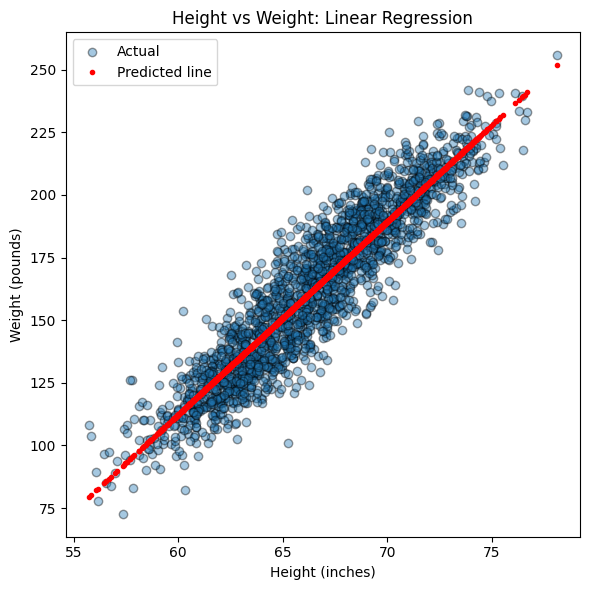

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Data Collection
df = pd.read_csv('weight-height.csv')

print("First 5 rows:")
print(df.head())
print("\nShape:", df.shape)

# 2. Data Preprocessing
X = df[['Height']].values   # 2D array
y = df['Weight'].values

# 3. Train–Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Model Training
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 5. Prediction
y_pred = lin_reg.predict(X_test)

# 6. Evaluation
r2 = r2_score(y_test, y_pred)
slope = lin_reg.coef_[0]
intercept = lin_reg.intercept_

print("\n--- Linear Regression Results ---")
print(f"R²:        {r2:.4f}")
print(f"Slope:     {slope:.4f}")
print(f"Intercept: {intercept:.4f}")

# 7. Visualization
plt.figure(figsize=(6, 6))
plt.scatter(X_test, y_test, alpha=0.4, label='Actual', edgecolor='k')
plt.plot(X_test, y_pred, 'r.', label='Predicted line')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Height vs Weight: Linear Regression')
plt.legend()
plt.tight_layout()
plt.show()


First 5 rows:
   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04

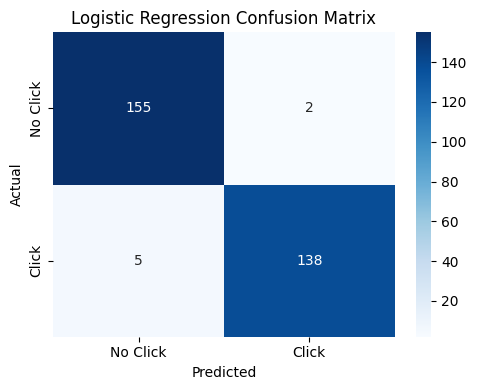

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Data Collection
df = pd.read_csv('advertising.csv')

print("First 5 rows:")
print(df.head())
print("\nShape:", df.shape)

# 2. Data Preprocessing
drop_cols = ['Ad Topic Line', 'City', 'Country', 'Timestamp']
df = df.drop(columns=drop_cols)

X = df.drop(columns=['Clicked on Ad'])
y = df['Clicked on Ad']

# 3. Train–Test Split (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

# 4. Hyperparameter Tuning & Training
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

log_reg = LogisticRegression(max_iter=1000)

grid = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("\nBest Parameters:", grid.best_params_)

# 5. Prediction
y_pred = best_model.predict(X_test)

# 6. Evaluation
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc*100:.2f}%\n")

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 7. Visualization: Confusion Matrix Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Click', 'Click'],
            yticklabels=['No Click', 'Click'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.tight_layout()
plt.show()
